In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import numpy, os, pandas 

In [3]:
import tensorflow

In [4]:
from tensorflow import keras

In [5]:
print(tensorflow.__version__)

1.11.0


In [6]:
AmesHousing = pandas.read_excel('../data/AmesHousing.xls')
AmesHousing.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [7]:
cd ..

D:\UofMemphis\Fall-18\COMP6993\DSP-COMP6993


In [8]:
from libpy import NS_dp

In [9]:
from sklearn.model_selection import train_test_split

We use our own function to clean Data

In [10]:
df = NS_dp.clean_Ames_Housing(AmesHousing)

E:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
data, labels = df.iloc[ : , 2: ].drop( columns=[ "SalePrice" ] ), df[ "SalePrice" ]

In [12]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

In [13]:
from libpy import FS

In [14]:
# train_data, train_labels, test_data, test_labels = FS.feature_select(df)

In [15]:
print("Training set: {}".format(train_data.shape))  # 1607 examples, ** features
print("Testing set:  {}".format(test_data.shape))   # 1071 examples, 13 features

Training set: (2142, 210)
Testing set:  (536, 210)


In [16]:
train_data.sample(10)

,Overall Cond,Year Built,Year Remod/Add,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,...,BsmtFin Type 2,Electrical,Functional,Kitchen Qual,Heating QC,Bsmt Cond,Garage Finish,Garage Qual,Garage Cond,Paved Drive
1473,5,1997,1997,0.0,0.0,2,1,3,1,7,...,5.0,4.0,7.0,4.0,2.0,4.0,0.0,4.0,4.0,2.0
634,6,1958,1958,0.0,0.0,1,0,2,1,5,...,5.0,4.0,7.0,4.0,1.0,4.0,1.0,4.0,4.0,2.0
2146,5,1988,1988,0.0,1.0,2,0,3,1,6,...,5.0,4.0,7.0,4.0,2.0,4.0,0.0,4.0,4.0,2.0
520,5,1961,1961,0.0,0.0,1,0,2,1,5,...,5.0,4.0,7.0,4.0,4.0,4.0,2.0,4.0,4.0,2.0
2023,6,1946,1950,0.0,0.0,2,0,4,2,8,...,5.0,1.0,7.0,4.0,4.0,4.0,2.0,4.0,4.0,2.0
193,9,1900,1996,0.0,0.0,2,0,4,2,8,...,5.0,4.0,7.0,2.0,2.0,4.0,2.0,4.0,4.0,0.0
201,5,1967,1967,0.0,0.0,1,0,3,1,5,...,5.0,4.0,7.0,4.0,4.0,4.0,2.0,4.0,4.0,2.0
337,5,2008,2009,1.0,0.0,2,0,1,1,9,...,5.0,4.0,7.0,0.0,0.0,4.0,0.0,4.0,4.0,2.0
595,8,1959,1998,1.0,0.0,2,0,3,1,6,...,5.0,4.0,7.0,2.0,4.0,4.0,2.0,4.0,4.0,2.0
1535,6,1976,1976,1.0,0.0,2,1,3,1,7,...,5.0,4.0,7.0,2.0,4.0,4.0,2.0,4.0,4.0,2.0


### Model building

### Train a model

In [17]:
from libpy import KR

In [18]:
model = KR.build_model(train_data)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                13504     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 17,729
Trainable params: 17,729
Non-trainable params: 0
_________________________________________________________________


In [19]:
history, model = KR.train_model( model, train_data, train_labels )


....................................................................................................
....................................................................................................
....................................................................................................
............................................

### Plot

In [20]:
from matplotlib import pyplot

In [21]:
from libpy import DNN_plot

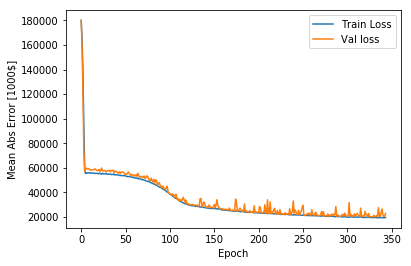

In [22]:
DNN_plot.plot_history(history)

In [23]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format( mae ))

Testing set Mean Abs Error: $24555605.50


In [24]:
test_predictions = model.predict(test_data).flatten()

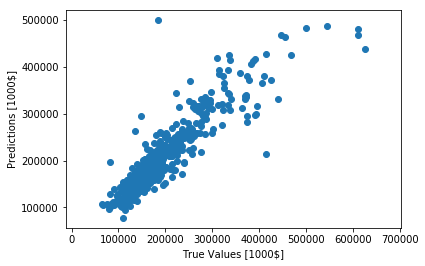

In [25]:
DNN_plot.plot_predict( test_labels, test_predictions )

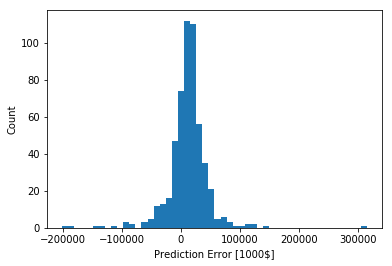

In [26]:
DNN_plot.plot_predict_error(test_labels, test_predictions)

### Experiment Overfitting

In [27]:
model_16 = KR.build_model(train_data, 16)
history_16, model_16 = KR.train_model( model_16, train_data, train_labels )
model_16.summary()


.
.......................................................................................................................................................................................................
.
.......................................................................................................................................................................................................
.
.......................................................................................................................................................................................................
.
.......................................................................................................................................................................................................
.
.............................................................................................................................................................................................

In [28]:
loss, acc = model_16.evaluate( train_data, train_labels )
print("Trained model, accuracy: {:5.2f}%".format(100*acc))

2142/2142 [==============================] - 0s 132us/step
Trained model, accuracy: 2157846.78%


In [29]:
model_32 = KR.build_model(train_data, 32)
history_32, model_32 = KR.train_model( model_32, train_data, train_labels )
model_32.summary()


.
.
..........................................................................................................................................................................................................................................................................................................
.
.
..........................................................................................................................................................................................................................................................................................................
.
.
..........................................................................................................................................................................................................................................................................................................
.
.
......................................................................................

In [30]:
loss, acc = model_32.evaluate( train_data, train_labels )
print("Trained model, accuracy: {:5.2f}%".format(100*acc))

2142/2142 [==============================] - 0s 114us/step
Trained model, accuracy: 1929627.64%


In [31]:
model_48 = KR.build_model(train_data, 48)
history_48, model_48 = KR.train_model( model_48, train_data, train_labels )
model_48.summary()


.
.
.
.............................................................................................................................................................................................................................................................................................................................................................................................................
.
.
.
.............................................................................................................................................................................................................................................................................................................................................................................................................
.
.
.
.........................................................................................................................................................................................

In [32]:
loss, acc = model_48.evaluate( train_data, train_labels )
print("Trained model, accuracy: {:5.2f}%".format(100*acc))

2142/2142 [==============================] - 0s 113us/step
Trained model, accuracy: 2014001.05%


In [33]:
model_64 = KR.build_model( train_data, 64 )
history_64, model_64 = KR.train_model( model_64, train_data, train_labels )
model_64.summary()


.
.
.
.
................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
.
.
.
.
......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [34]:
loss, acc = model_64.evaluate( train_data, train_labels )
print("Trained model, accuracy: {:5.2f}%".format(100*acc))

2142/2142 [==============================] - 0s 156us/step
Trained model, accuracy: 1945949.16%


In [35]:
model_128 = KR.build_model( train_data, 128)
history_128, model_128 = KR.train_model( model_128, train_data, train_labels )
model_128.summary()


.
.
.
.
.
...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
.
.
.
.
.
...............................................................................................................................................................................................................................................................................................................................................................................................

In [36]:
loss, acc = model_128.evaluate( train_data, train_labels )
print("Trained model, accuracy: {:5.2f}%".format(100*acc))

2142/2142 [==============================] - 0s 124us/step
Trained model, accuracy: 2139726.00%


In [37]:
model_512 = KR.build_model(train_data, 512)
history_512, model_512 = KR.train_model( model_512, train_data, train_labels )
model_512.summary()


.
.
.
.
.
.
......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
.
.
.
.
.
.
....................................................................................................................................................................................................................................................................____________________

In [38]:
loss, acc = model_512.evaluate( train_data, train_labels )
print("Trained model, accuracy: {:5.2f}%".format(100*acc))

2142/2142 [==============================] - 0s 136us/step
Trained model, accuracy: 1943671.55%


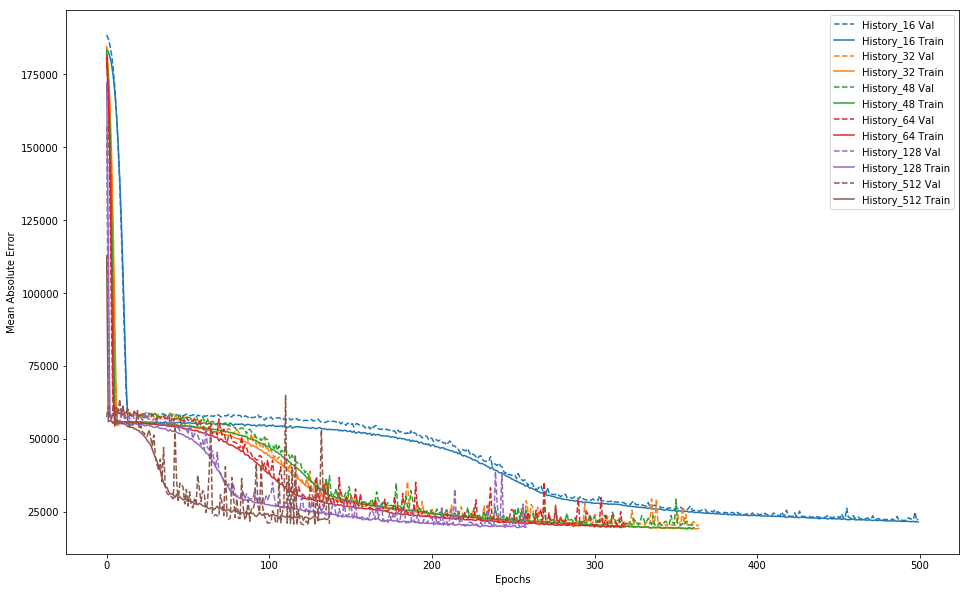

In [39]:
DNN_plot.plot_compare_history( [
    ('history_16', history_16 ),
    ('history_32', history_32 ),
    ('history_48', history_48 ),
    ('history_64', history_64 ),
    ('history_128', history_128 ),
    ('history_512', history_512 )
] )

In [ ]:
test_predictions = model_128.predict(test_data).flatten()
DNN_plot.plot_predict(test_labels, test_predictions)

In [ ]:
DNN_plot.plot_predict_error(test_labels, test_predictions)

### Manually save weights

In [ ]:
# create a new model
model_l2 = KR.build_model( train_data, 128 )
history_l2, model_l2 = KR.train_model( model_l2, train_data, train_labels )
model_l2.summary()


checkpoint_path = "../training_2/"
checkpoint_dir = checkpoint_path + "my_checkpoint"

loss, acc = model_l2.evaluate( train_data, train_labels )
print("Trained model, accuracy: {:5.2f}%".format(100*acc))

# Save the weights
model_l2.save_weights( checkpoint_dir )

# # load the latest weight
latest = tensorflow.train.latest_checkpoint( checkpoint_path )
print( latest )

# Restore the weights
model_l2 = KR.build_model( train_data, 128 )
# # restore latest weight from file
model_l2.load_weights(latest)

loss,acc = model_l2.evaluate( train_data, train_labels )
print("Restored model, accuracy: {:5.2f}%".format(100*acc))